## Beer Alcohol per Calorie (APC)

Maybe alcohol isn't what drinking beer is all about. It's definitely also about calories. They don't call it a beer belly for nothing. So maybe **APC** should be a thing?

In [9]:
import pandas as pd
import lxml
from matplotlib import pyplot
import plotly.express as px

**Thank you homebrewacademy.com for the simple to import table!**

In [10]:
beer = pd.read_html('https://homebrewacademy.com/beer-alcohol-content-list/')

In [11]:
print(f'Total tables: {len(beer)}')

Total tables: 2


In [12]:
# Need the first table, and need to strip off the '%' symbol and make it a float
df = beer[0]
df['ABV'] = df['ABV'].str[:-1]
df['ABV'] = df['ABV'].astype('float')
df.head()

,Brand,Calories,ABV
0,Abita Amber,128,4.5
1,Abita Golden,125,4.2
2,Abita Jockamo IPA,190,6.5
3,Abita Light,118,4.0
4,Abita Purple Haze,128,4.2


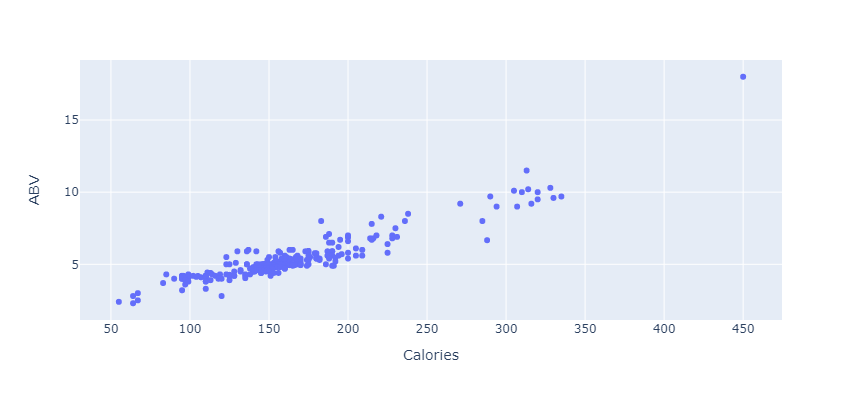

In [31]:
# Start with a simple plotly express plot
fig = px.scatter(df, x="Calories", y="ABV",  hover_data=['Brand'],
                width=400, height=400)
fig.show()

In [14]:
# But the residual isn't really what's important. How about a ratio?
df['apc'] = df['ABV']/df['Calories']
df = df.sort_values(['apc'],ascending=False)

In [17]:
# So which beers give you the most alcohol per calorie?
df.head(10)

,Brand,Calories,ABV,apc
136,Michelob Ultra Pure Gold,85,4.3,0.050588
153,Natural Ice,130,5.9,0.045385
149,Molson Canadian 67,67,3.0,0.044776
33,Bud Ice,123,5.5,0.044715
193,Rolling Rock Green Light,83,3.7,0.044578
52,Corona Premier,90,4.0,0.044444
154,Natural Light,95,4.2,0.044211
133,Michelob Ultra,95,4.2,0.044211
37,Bud Light Platinum,137,6.0,0.043796
142,Miller Lite,96,4.2,0.043750


So it's mostly "light" and "ice" beers winning the "bang for the buck" test but the highest ABV beer is also in the top 30. Way to go Dogfish Head.

Maybe try something a little fancier...

In [32]:
pd.qcut(df["apc"], q=5, labels=False)
df['Quintile'] = pd.qcut(df["apc"], q=5, labels=False)
df.head(10)

,Brand,Calories,ABV,apc,Quintile
136,Michelob Ultra Pure Gold,85,4.3,0.050588,4
153,Natural Ice,130,5.9,0.045385,4
149,Molson Canadian 67,67,3.0,0.044776,4
33,Bud Ice,123,5.5,0.044715,4
193,Rolling Rock Green Light,83,3.7,0.044578,4
52,Corona Premier,90,4.0,0.044444,4
154,Natural Light,95,4.2,0.044211,4
133,Michelob Ultra,95,4.2,0.044211,4
37,Bud Light Platinum,137,6.0,0.043796,4
142,Miller Lite,96,4.2,0.043750,4


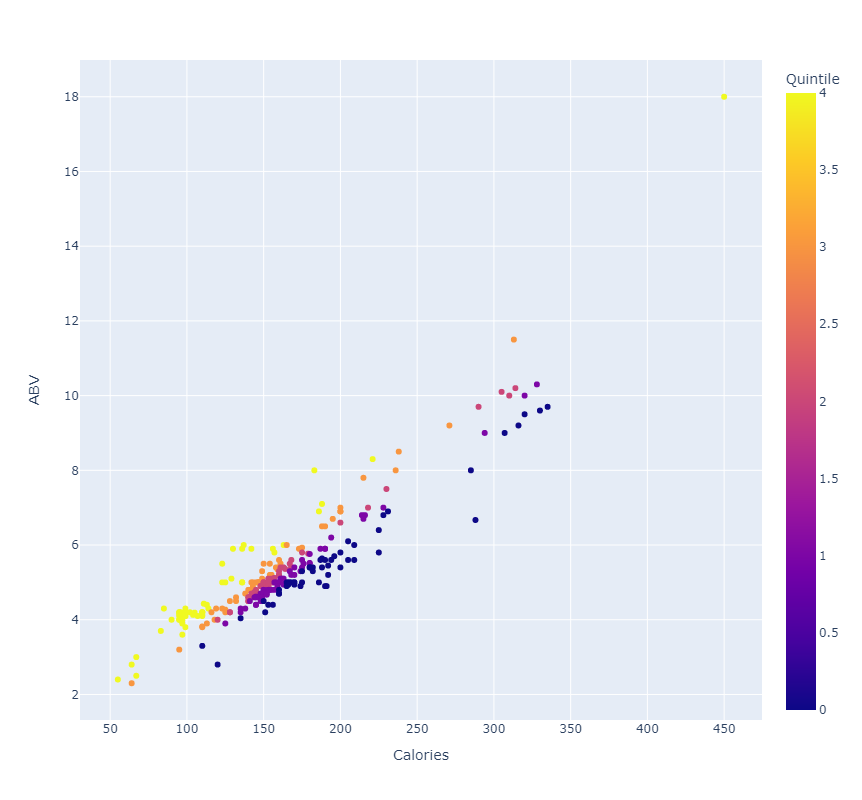

In [33]:
# Start with a simple plotly express plot
fig = px.scatter(df, x="Calories", y="ABV",  hover_data=['Brand'], color="Quintile",
                width=800, height=800)
fig.show()

Perhaps it's no surprise that the highest quintile APC are above where the regression line would be but that yellow dot at 18% is interesting.